In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [143]:
df = pd.read_csv('/content/iris.data', header=None, names=['sepal_length', 'sepal_width', 'petal_length', 'petal-width', 'species'])

In [144]:
print(df)

     sepal_length  sepal_width  petal_length  petal-width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


In [145]:
X = df.iloc[:, :2]
print(X)

     sepal_length  sepal_width
0             5.1          3.5
1             4.9          3.0
2             4.7          3.2
3             4.6          3.1
4             5.0          3.6
..            ...          ...
145           6.7          3.0
146           6.3          2.5
147           6.5          3.0
148           6.2          3.4
149           5.9          3.0

[150 rows x 2 columns]


In [146]:
Y = (df['species'] == 'Iris-virginica').astype(int)
print(Y)

0      0
1      0
2      0
3      0
4      0
      ..
145    1
146    1
147    1
148    1
149    1
Name: species, Length: 150, dtype: int64


In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [148]:
print(X_train)


     sepal_length  sepal_width
22            4.6          3.6
15            5.7          4.4
65            6.7          3.1
11            4.8          3.4
42            4.4          3.2
..            ...          ...
71            6.1          2.8
106           4.9          2.5
14            5.8          4.0
92            5.8          2.6
102           7.1          3.0

[120 rows x 2 columns]


In [149]:
X_train = np.c_[np.ones((X_train.shape[0],1)),X_train]


In [150]:
X_test = np.c_[np.ones((X_test.shape[0],1)), X_test]

In [151]:
print(X_test[:10, :3])

[[1.  6.1 2.8]
 [1.  5.7 3.8]
 [1.  7.7 2.6]
 [1.  6.  2.9]
 [1.  6.8 2.8]
 [1.  5.4 3.4]
 [1.  5.6 2.9]
 [1.  6.9 3.1]
 [1.  6.2 2.2]
 [1.  5.8 2.7]]


In [152]:
print(X_train[:10, :3])

[[1.  4.6 3.6]
 [1.  5.7 4.4]
 [1.  6.7 3.1]
 [1.  4.8 3.4]
 [1.  4.4 3.2]
 [1.  6.3 2.5]
 [1.  6.4 3.2]
 [1.  5.2 3.5]
 [1.  5.  3.6]
 [1.  5.2 4.1]]


In [153]:
#Sigmoid function

def Sigmoid(z):
  return 1 / (1 + np.exp(-z))

In [154]:
# Log-likelihood Function

def log_likelihood(X, Y, theta):
  z = np.dot(X, theta)
  return np.sum(Y * np.log(Sigmoid(z)) + (1 - Y) * np.log(1 - Sigmoid(z)))

In [160]:
# Gradient of Log-likelihood

def gradient(X, Y, theta):
  z = np.dot(X, theta)
  return np.dot(X.T, Sigmoid(z) - Y)

In [161]:
# Gradient Descent
def gradient_descent(X, y, theta, learning_rate, num_iterations):
    for i in range(num_iterations):
        grad = gradient(X, y, theta)
        theta -= learning_rate * grad

        log_likelihood_value = log_likelihood(X, y, theta)
        print(f'Iteration {i}, Log-likelihood: {log_likelihood_value}, Theta: {theta}')

    return theta


In [162]:
#Hyperparameters
learning_rate = 0.001
num_iterations = 1000

In [163]:
# Initialize weights (including bias) randomly
np.random.seed(0)
theta = np.random.rand(X_train.shape[1])

In [164]:
# Train the logistic regression model using gradient descent
theta = gradient_descent(X_train, y_train, theta, learning_rate, num_iterations)

Iteration 0, Log-likelihood: -252.83218814759272, Theta: [0.46801948 0.27400272 0.35217236]
Iteration 1, Log-likelihood: -86.55468762413378, Theta: [ 0.39216402 -0.13922467  0.11639995]
Iteration 2, Log-likelihood: -82.50004257580476, Theta: [ 0.37297768 -0.21951594  0.05335869]
Iteration 3, Log-likelihood: -81.85017706247453, Theta: [ 0.37303568 -0.18705889  0.04950054]
Iteration 4, Log-likelihood: -81.49012305000765, Theta: [ 0.36837836 -0.18236256  0.03125567]
Iteration 5, Log-likelihood: -81.14555964558485, Theta: [ 0.36463936 -0.17246854  0.01592756]
Iteration 6, Log-likelihood: -80.80762578790493, Theta: [ 3.60722789e-01 -1.63794414e-01  1.50388663e-04]
Iteration 7, Log-likelihood: -80.4757923457479, Theta: [ 0.3568634  -0.15496324 -0.01535627]
Iteration 8, Log-likelihood: -80.14992635843046, Theta: [ 0.35301121 -0.14626647 -0.03074685]
Iteration 9, Log-likelihood: -79.82991374328388, Theta: [ 0.34917676 -0.13764069 -0.04599004]
Iteration 10, Log-likelihood: -79.51564292844654, T

In [165]:
# Predictions
def predict(X, theta):
    return Sigmoid(np.dot(X, theta))

In [166]:
# Evaluate on the test set
y_pred = predict(X_test, theta)
y_pred_binary = (y_pred >= 0.5).astype(int)


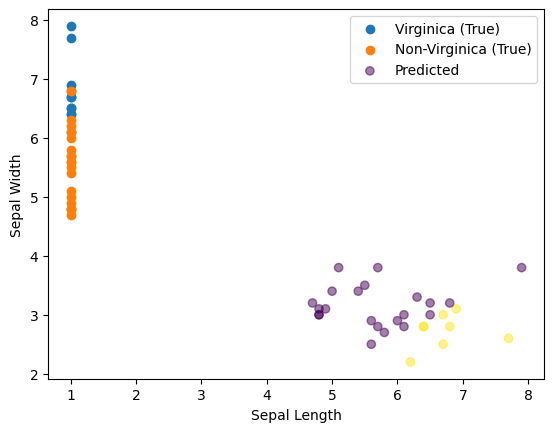

In [167]:
# Visualize the results
plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], label='Virginica (True)')
plt.scatter(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1], label='Non-Virginica (True)')
plt.scatter(X_test[:, 1], X_test[:, 2], c=y_pred_binary, cmap='viridis', alpha=0.5, label='Predicted')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()